In [131]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels
from scipy.stats import norm

In [132]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [134]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [135]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [136]:
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

#Zamiana w kolumnie DRIVEWHEEL danych:  
FWD na 1(przedni napęd), 
RWD na 2 (tylni napęd) oraz 
4WD na 4(napęd na 4 koła).


In [137]:
df['drivewheel']=df['drivewheel'].replace({'fwd':1,'rwd':2, '4wd':4})

In [138]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,2,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,2,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,2,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,1,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [139]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [140]:
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [141]:
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [142]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [143]:
df.CarName.value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [144]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [145]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


car_ID                103.000000
symboling               0.834146
drivewheel              1.502439
wheelbase              98.756585
carlength             174.049268
carwidth               65.907805
carheight              53.724878
curbweight           2555.565854
enginesize            126.907317
boreratio               3.329756
stroke                  3.255415
compressionratio       10.142537
horsepower            104.117073
peakrpm              5125.121951
citympg                25.219512
highwaympg             30.751220
price               13276.710571
dtype: float64

#Zamiana FUELTYPE na GAS_1/Disel_0 oraz zmiana wartości z obiektów na int 1/0

In [146]:
df=df.rename(columns={'fueltype':'gas_1/disel_0'})

In [147]:
df['gas_1/disel_0']=df['gas_1/disel_0'].replace({'gas': 1, 'diesel': 0})

In [148]:
df['gas_1/disel_0']=df['gas_1/disel_0'].replace({'gas': 1, 'diesel': 0})

#Zamiana w kolumnie DOORNUMBER nazw na cyfry

In [149]:
df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [150]:
df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})

In [151]:
df['doornumber']=df['doornumber'].astype(float)

#Zmiana danych w kolumnie **aspiration** na:
-std: 1

-turbo:2

Jest to określenie panewki korbowej w silniku, a dokładnie jej rodzaju.

In [152]:
df['aspiration']=df['aspiration'].replace({'std':1,'turbo':2})

#Zmiana danych w kolumnie **enginelocation** na:

-front: 1

-rear: 2

Jest to kolumna określająca gdzie leży jednostka zasilająca.

In [153]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [154]:
df['enginelocation']=df['enginelocation'].replace({'front':1,'rear':2})

In [155]:
df['enginelocation'].head()

0    1
1    1
2    1
3    1
4    1
Name: enginelocation, dtype: int64

#Zmiana danych w kolumnie **cylindernumber** ze słownych na cyfry

In [156]:
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [157]:
df['cylindernumber']=df['cylindernumber'].replace({'two':2,'three':3,'four':4,'six':6,'five':5,'eight':8,'twelve':12})

#Zmienna enginetype

In [158]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

#Rozbicie danych na części względem **carbody**

In [159]:
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [160]:
sedan=df[df['carbody']=='sedan']

In [161]:
hatchback=df[df['carbody']=='hatchback']

In [162]:
wagon=df[df['carbody']=='wagon']

In [163]:
hardtop=df[df['carbody']=='hardtop']

In [164]:
convertible=df[df['carbody']=='convertible']

In [165]:
wagon.head()

,car_ID,symboling,CarName,gas_1/disel_0,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
7,8,1,audi 5000,1,1,4.0,wagon,1,1,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.0
28,29,-1,dodge dart custom,1,1,4.0,wagon,1,1,103.3,...,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921.0
36,37,0,honda civic 1500 gl,1,1,4.0,wagon,1,1,96.5,...,92,1bbl,2.92,3.41,9.2,76,6000,30,34,7295.0
68,69,-1,buick century luxus (sw),0,2,4.0,wagon,2,1,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0
93,94,1,nissan titan,1,1,4.0,wagon,1,1,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7349.0


In [166]:
sedan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 3 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            96 non-null     int64  
 1   symboling         96 non-null     int64  
 2   CarName           96 non-null     object 
 3   gas_1/disel_0     96 non-null     int64  
 4   aspiration        96 non-null     int64  
 5   doornumber        96 non-null     float64
 6   carbody           96 non-null     object 
 7   drivewheel        96 non-null     int64  
 8   enginelocation    96 non-null     int64  
 9   wheelbase         96 non-null     float64
 10  carlength         96 non-null     float64
 11  carwidth          96 non-null     float64
 12  carheight         96 non-null     float64
 13  curbweight        96 non-null     int64  
 14  enginetype        96 non-null     object 
 15  cylindernumber    96 non-null     int64  
 16  enginesize        96 non-null     int64  
 17

#**Sedan**

Mapa ciepła

In [167]:
corr=sedan.corr()

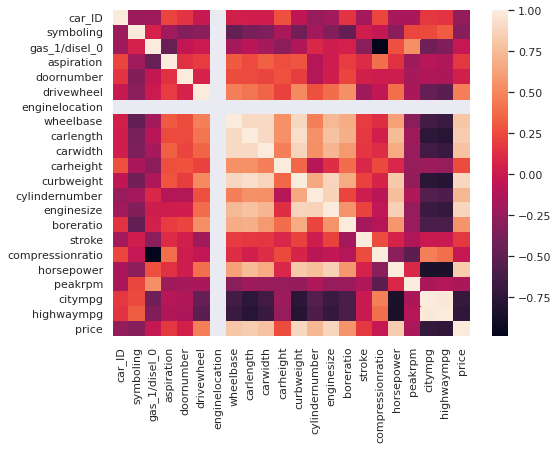

In [168]:
plt.figure(figsize=(8,6))
sns.heatmap(corr)

In [169]:
corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, car_ID to price
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            21 non-null     float64
 1   symboling         21 non-null     float64
 2   gas_1/disel_0     21 non-null     float64
 3   aspiration        21 non-null     float64
 4   doornumber        21 non-null     float64
 5   drivewheel        21 non-null     float64
 6   enginelocation    0 non-null      float64
 7   wheelbase         21 non-null     float64
 8   carlength         21 non-null     float64
 9   carwidth          21 non-null     float64
 10  carheight         21 non-null     float64
 11  curbweight        21 non-null     float64
 12  cylindernumber    21 non-null     float64
 13  enginesize        21 non-null     float64
 14  boreratio         21 non-null     float64
 15  stroke            21 non-null     float64
 16  compressionratio  21 non-null     float64
 

#Usunięcie danej **enginelocation**

In [170]:
df.drop(['enginelocation'], axis=1, inplace=True)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   gas_1/disel_0     205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    float64
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [176]:
corr=sedan.corr()

In [177]:
sedan=df[df['carbody']=='sedan']
hatchback=df[df['carbody']=='hatchback']
wagon=df[df['carbody']=='wagon']
hardtop=df[df['carbody']=='hardtop']
convertible=df[df['carbody']=='convertible']

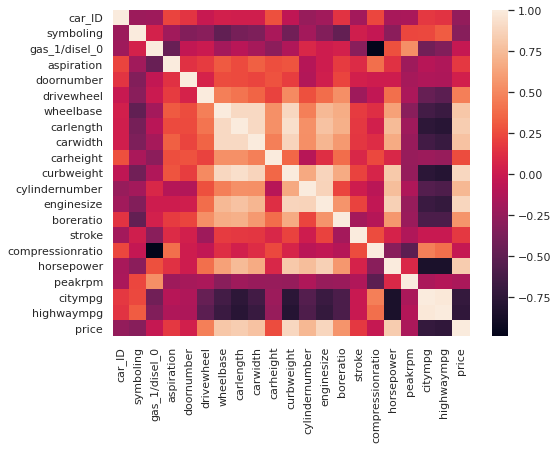

In [178]:
plt.figure(figsize=(8,6))
sns.heatmap(corr)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   gas_1/disel_0     205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    float64
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

#Zależność między rozstawem osi (wheelebase) a długością auta (carlength)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

<Figure size 1728x1440 with 0 Axes>

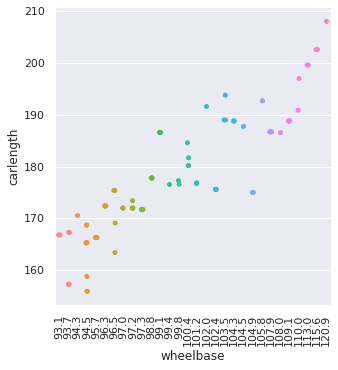

In [174]:
plt.figure(figsize=(24,20))
sns.catplot(x='wheelbase',y='carlength', data=sedan)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

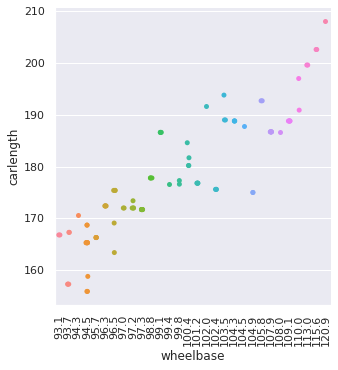

In [175]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x='wheelbase',y='carlength', data=sedan)
plt.xticks(rotation=90)

#Zależność między długością auta, a masą włąsną (curbweight)

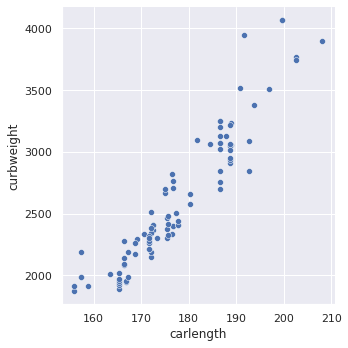

In [184]:
sns.relplot(x="carlength",y="curbweight",data=sedan)

#Zależnść miedzy ceną, a ilością koni

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]), <a list of 89 Text major ticklabel objects>)

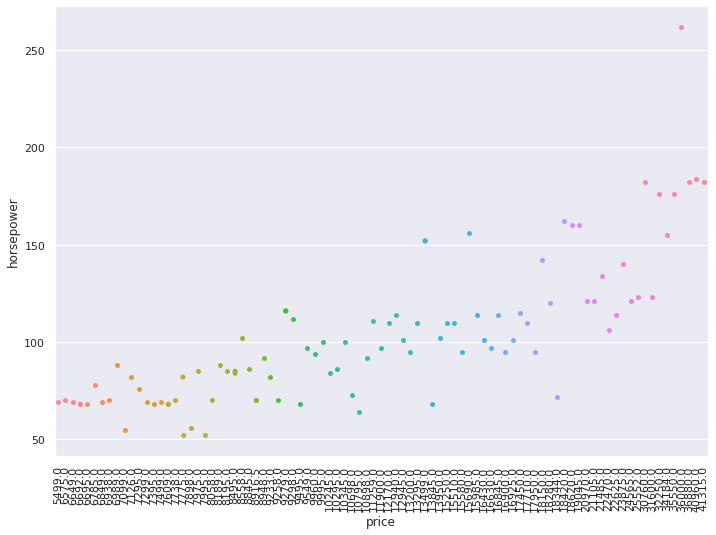

In [186]:
sns.stripplot(x='price', y='horsepower', data=sedan)
plt.xticks(rotation=90)

#Zależność miedzy ilością koni a siłą samochodu

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

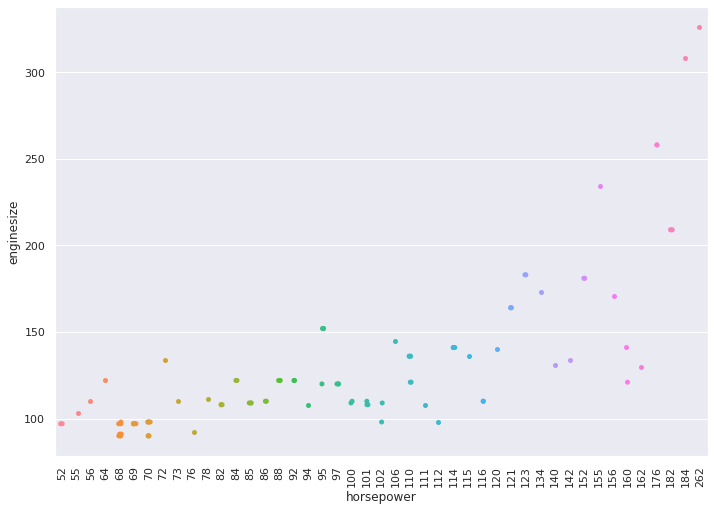

In [188]:
sns.stripplot(x='horsepower',y='enginesize', data=sedan)
plt.xticks(rotation=90)

#Zależność między rozstawem osi a szerokością auta

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

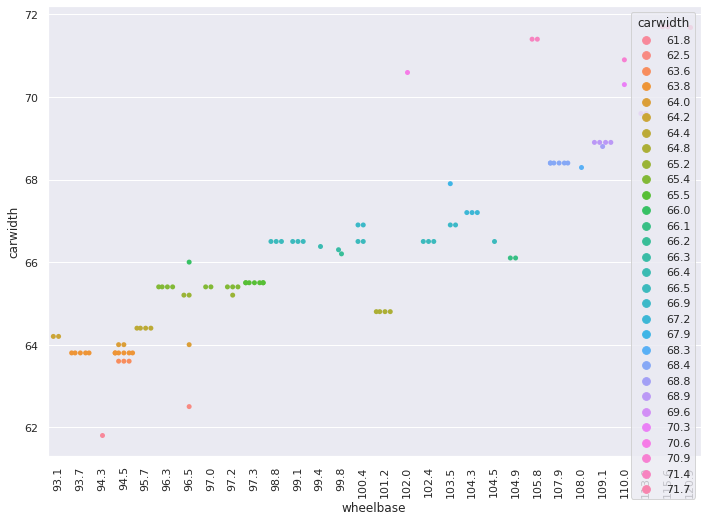

In [191]:
sns.swarmplot(data=sedan, x="wheelbase", y="carwidth", hue="carwidth")
plt.xticks(rotation=90)

#Zależność między długością auta a jego szerokością

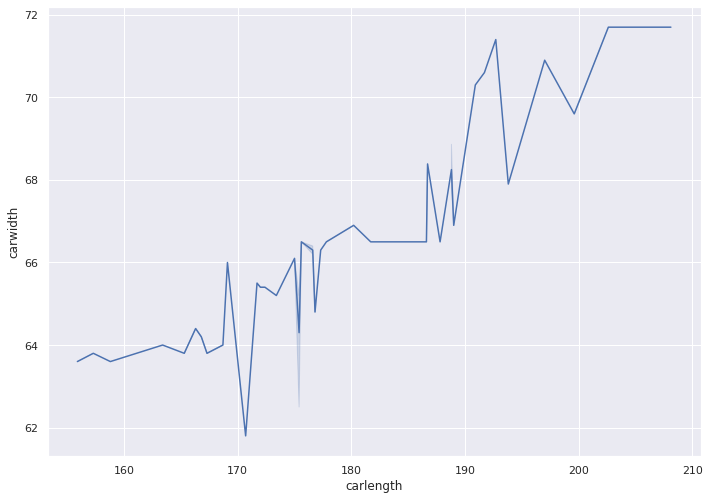

In [194]:
sns.lineplot(data=sedan, x='carlength', y='carwidth')

#Regresja dla sedan

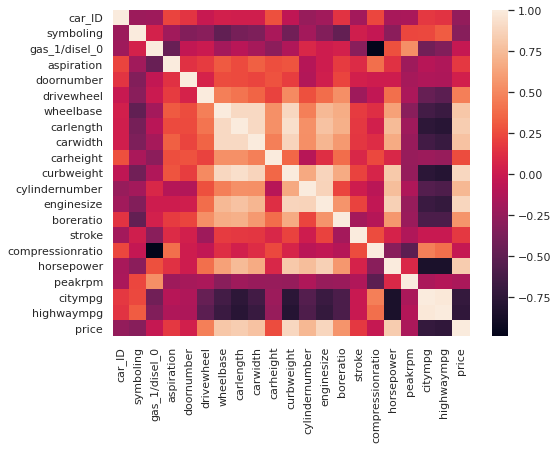

In [195]:
plt.figure(figsize=(8,6))
sns.heatmap(corr)

In [198]:
X=sedan[['wheelbase','horsepower','enginesize','curbweight', 'carlength','carwidth','cylindernumber']]

In [199]:
y=sedan[['price']]

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import statsmodels.api as sm

#**Powierzchnia treningowa 80%**

In [201]:
from pandas.core.common import random_state
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=123)

In [202]:
X.shape

(96, 7)

In [203]:
y.shape

(96, 1)

In [204]:
print(X_train.shape, X_test.shape)

(76, 7) (20, 7)


In [205]:
model_lin1=LinearRegression()
model_lin1.fit(X_train, y_train)

LinearRegression()

In [206]:
y_pred_train1=model_lin1.predict(X_train)

In [207]:
y_pred_test1=model_lin1.predict(X_test)

Wynik

In [208]:
r2_score(y_test, y_pred_test1)

0.8901889419210285

Wynik

In [209]:
bias_train=mean_absolute_percentage_error(y_train, y_pred_train1)
print(bias_train)

0.17091182242597996


In [230]:
model_lin1.intercept_

array([-44501.32580182])

In [231]:
model_lin1.coef_

array([[ 5.22721641e+02,  5.68689270e+01,  7.14549891e+01,
        -3.08450416e-01,  8.26772472e+01, -3.76020939e+02,
         3.94634685e+02]])

#Regresja

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split

In [235]:
lr = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(estimator=lr, X=X, y=y, cv=cv)
r2_scores

array([0.86276197, 0.75257692, 0.75926242, 0.75000644, 0.78194436])

In [236]:
lr = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
preds = cross_val_predict(estimator=lr, X=X, y=y, cv=cv)
preds

array([[11641.0061164 ],
       [15145.36417669],
       [14873.02832237],
       [19546.18511423],
       [17846.53793942],
       [12581.3170064 ],
       [11906.92795407],
       [19698.49910615],
       [19722.86869773],
       [19625.94827613],
       [25058.31712003],
       [24864.30379919],
       [27279.49456324],
       [ 5871.99129975],
       [ 5005.5979936 ],
       [ 5833.39996001],
       [ 8011.04881308],
       [ 7255.01997482],
       [10052.45995841],
       [ 8881.61601139],
       [10749.67585161],
       [ 9859.57210149],
       [10367.99399078],
       [ 5434.49658549],
       [ 5791.27812386],
       [34113.48866517],
       [33108.08455361],
       [50877.58600359],
       [ 5491.1611276 ],
       [ 5271.10269951],
       [11399.66735482],
       [11399.66735482],
       [ 9941.70195151],
       [16736.12449089],
       [12676.93682149],
       [23944.56559655],
       [26336.83140287],
       [34061.94094202],
       [43701.8593295 ],
       [10042.44726692],


In [238]:
predict_data = np.array([[45, 1, 25, 1, 1], [45, 0, 25, 1, 1]])
predict_data

array([[45,  1, 25,  1,  1],
       [45,  0, 25,  1,  1]])

#**Drzewo**

In [210]:
from sklearn.tree import DecisionTreeRegressor

In [211]:
X=sedan[['wheelbase','horsepower','enginesize','curbweight', 'carlength','carwidth','cylindernumber']]
y=sedan[['price']]

In [220]:
model=DecisionTreeRegressor()
model.fit(X,y)

DecisionTreeRegressor()

In [221]:
predict_data=np.array([[3200,3], [3720,2]])

In [222]:
model.get_depth()

12

In [215]:
model.get_n_leaves()

88

In [223]:
model=DecisionTreeRegressor(max_depth=6, min_samples_split=3)
model.fit(X,y)

DecisionTreeRegressor(max_depth=6, min_samples_split=3)

In [224]:
model.get_depth()

6

In [225]:
model.get_n_leaves()

32

In [226]:
from sklearn import tree

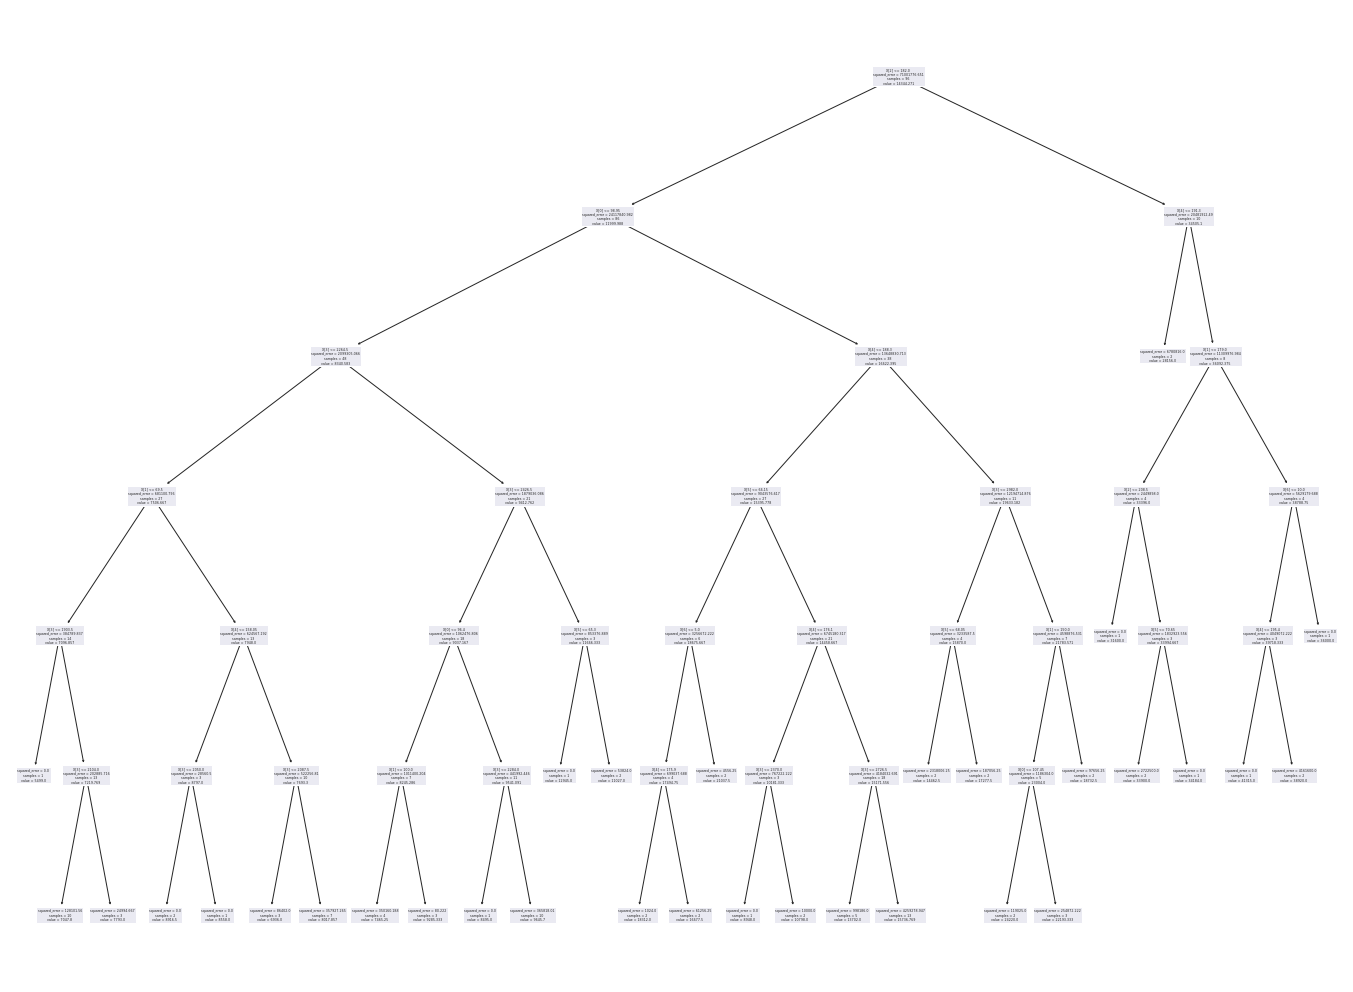

In [227]:
fig, ax=plt.subplots(figsize=(24,18))
ax=tree.plot_tree(model)
plt.show()